<a href="https://colab.research.google.com/github/Balajivasudevan03/Netflix_business_case/blob/main/Copy_of_Final_Netflix_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/netflix_dataset.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [69]:
A = df.groupby("type")["title"].count().reset_index()
A["percentage"] = A["title"].apply(lambda x: (x/df.shape[0])*100).round(2)
A

,type,title,percentage
0,Movie,6131,69.62
1,TV Show,2676,30.38


In [3]:
df.shape

(8807, 12)

In [4]:
df["title"].isna().sum()

0

In [5]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [6]:
df.shape

(8807, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#Data prepartion for "cast" column!!

In [8]:
cast_df=pd.DataFrame(df["cast"].apply(lambda x: str(x).split(",")).tolist(), index=df["title"])
cast_df=cast_df.stack().reset_index()
cast_df.drop("level_1",axis=1,inplace=True)
cast_df.rename(columns={0:"cast"},inplace=True)
cast_df
cast_df.dtypes

,0
title,object
cast,object


In [9]:
cast_df["title"] = cast_df["title"].apply(lambda x: str(x).strip())

cast_df["cast"] = cast_df["cast"].apply(lambda x: x.strip())

In [10]:
cast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64951 entries, 0 to 64950
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   64951 non-null  object
 1   cast    64951 non-null  object
dtypes: object(2)
memory usage: 1015.0+ KB


#Data prepartion for "director" column!!

In [11]:
director_df=pd.DataFrame(df["director"].apply(lambda x: str(x).split(",")).tolist(), index=df["title"])
director_df=director_df.stack().reset_index()
director_df.drop("level_1",axis=1,inplace=True)
director_df.rename(columns={0:"director"},inplace=True)
director_df

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [12]:
director_df["title"] = cast_df["title"].apply(lambda x: x.strip())
director_df["director"] = director_df["director"].apply(lambda x: x.strip())

In [13]:
director_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9612 entries, 0 to 9611
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     9612 non-null   object
 1   director  9612 non-null   object
dtypes: object(2)
memory usage: 150.3+ KB


#Data preparation for "country" column!!

In [14]:
country_df=pd.DataFrame(df["country"].apply(lambda x: str(x).split(",")).tolist(), index=df["title"])
country_df=country_df.stack().reset_index()
country_df.drop("level_1",axis=1,inplace=True)
country_df.rename(columns={0:"country"},inplace=True)
country_df

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10845,Zodiac,United States
10846,Zombie Dumb,nan
10847,Zombieland,United States
10848,Zoom,United States


In [15]:
country_df["title"] = cast_df["title"].apply(lambda x: x.strip())
country_df["country"] = country_df["country"].apply(lambda x: x.strip())

In [16]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10850 entries, 0 to 10849
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    10850 non-null  object
 1   country  10850 non-null  object
dtypes: object(2)
memory usage: 169.7+ KB


#Data preparation for "listed_in" column!!

In [17]:
listed_in_df=pd.DataFrame(df["listed_in"].apply(lambda x: str(x).split(",")).tolist(), index=df["title"])
listed_in_df=listed_in_df.stack().reset_index()
listed_in_df.drop("level_1",axis=1,inplace=True)
listed_in_df.rename(columns={0:"listed_in"},inplace=True)
listed_in_df

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


In [18]:
listed_in_df["title"] = listed_in_df["title"].apply(lambda x: x.strip())
listed_in_df["listed_in"] = listed_in_df["listed_in"].apply(lambda x: x.strip())

In [19]:
listed_in_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19323 entries, 0 to 19322
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      19323 non-null  object
 1   listed_in  19323 non-null  object
dtypes: object(2)
memory usage: 302.0+ KB


#Creating the new data-frame out, from the preprocessed columns and naming it as "New_df"!!!

In [20]:
New_df=director_df.merge(cast_df,on="title",how="inner")

In [21]:
New_df=New_df.merge(country_df,on="title",how="inner")

In [22]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [23]:
New_df=df[["show_id","type","title"]].merge(New_df,on="title",how="inner")

In [24]:
New_df=New_df.merge(df[['title','date_added','release_year', 'rating', 'duration']],on="title",how="inner")

In [25]:
New_df=New_df.merge(listed_in_df,on="title",how="inner")

In [26]:
New_df=New_df.merge(df[["title","description"]],on="title",how="inner")

In [27]:
New_df.shape

(3325675, 12)

In [28]:
New_df.info()
New_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3325675 entries, 0 to 3325674
Data columns (total 12 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   show_id       object
 1   type          object
 2   title         object
 3   director      object
 4   cast          object
 5   country       object
 6   date_added    object
 7   release_year  int64 
 8   rating        object
 9   duration      object
 10  listed_in     object
 11  description   object
dtypes: int64(1), object(11)
memory usage: 304.5+ MB


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


#Replacing the missing values in respective columns!!("nan")

In [29]:
New_df["director"].replace(["nan"],["unknown director"],inplace=True)
New_df["cast"].replace(["nan"],["unknown actor"],inplace=True)
New_df["country"].replace(["nan"],["unknown country"],inplace=True)

#Filling the countionous missing values in the respective columns!!("NaN")

In [30]:
New_df["date_added"].fillna(0,inplace=True)
New_df["rating"].fillna(0,inplace=True)
New_df["duration"].fillna(0,inplace=True)

In duration column, it was observed that the nulls had values which were written in corresponding ratings column, i.e- you can't expect ratings to be in min. So the duration column nulls are replaced by corresponding values in ratings column

In [31]:
New_df.loc[New_df['duration']==np.NaN]
New_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [32]:
#New_df.loc[New_df['duration'].isnull(),'duration']=New_df.loc[New_df['duration'].isnull(),'duration'].fillna(New_df['rating'])
#New_df.loc[New_df['rating'].str.contains('min', na=False),'rating']='NR'
#New_df.isnull().sum()

# 1. How has the number of movies released per year changed over the last 20-30 years?(analysis done for last 3-decades or 30-years)

In [33]:
# splitting the data frame into two!!!(TV_show and Movie)
Movie_df=New_df.loc[New_df["type"]=="Movie"]
TV_Show_df = New_df.loc[New_df["type"]=="TV Show"]

In [34]:
filtered=Movie_df.loc[Movie_df["release_year"].apply(lambda x:  x >= 1991)]
filtered=filtered.groupby("release_year")["title"].nunique().sort_values(ascending = False).reset_index()
filtered.rename(columns={"title":"count_of_movies_released"},inplace=True)
filtered.head(20)

,release_year,count_of_movies_released
0,2021,216
1,2020,74
2,2019,48
3,2018,36
4,2017,32
5,2010,27
6,2013,27
7,2015,26
8,2012,23
9,2016,23


# Graphical_representation for question:1....

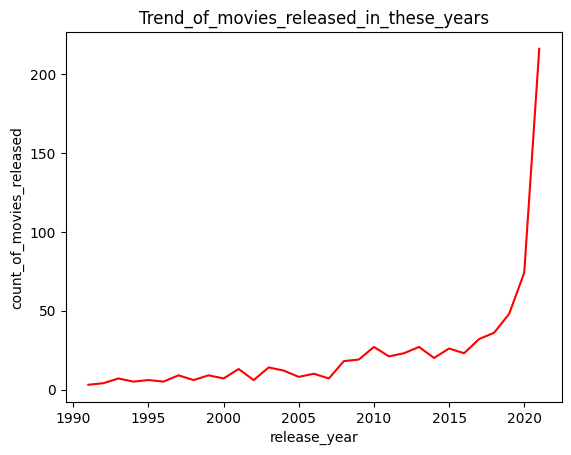

In [35]:
sns.lineplot(x="release_year",y="count_of_movies_released",data=filtered,color="red")
plt.title("Trend_of_movies_released_in_these_years")
plt.show()

# question : 1 -->> insights :     
1) As you can see from the graph, the movies getting released every five year is in increasing trend.

2) There is a steady decrease in movies getting released after 2017 to 2021, as we can infere from the line chart.

3) If you closely observe there is a steady release of movies between 2015 to 2017

# question : 1 --->>> recommendation :     

1. Since the movies getting released is decreaing fashion in recent times, would definetely recommend netflix not to add more movies in the platform.

2. Would definetely recommend netflix to add more TV shows rather adding movies, because that would definetely reduce the budget and also invole lot of TV audience to watch new netflix contents.



# 2. Comparison of tv shows vs. movies!!

In [36]:
Top_20_countries_producing_movies=Movie_df.groupby("country")["title"].nunique().sort_values(ascending=False).reset_index().head(20)
Top_20_countries_producing_movies.rename(columns={"title":"Distinct_count_of_movies"},inplace=True)
Top_20_countries_producing_movies

,country,Distinct_count_of_movies
0,United States,675
1,United Kingdom,340
2,India,338
3,unknown country,289
4,Canada,209
5,France,199
6,Japan,145
7,Spain,136
8,Germany,127
9,South Korea,114


# 2. Comparison of tv shows vs. movies!!

In [37]:
Top_20_countries_producing_TV_Shows=TV_Show_df.groupby("country")["title"].nunique().sort_values(ascending=False).reset_index().head(20)
Top_20_countries_producing_TV_Shows.rename(columns={"title":"Distinct_count_of_TV_Shows"},inplace=True)
Top_20_countries_producing_TV_Shows

,country,Distinct_count_of_TV_Shows
0,United States,305
1,unknown country,148
2,India,144
3,United Kingdom,140
4,Canada,98
5,Japan,87
6,France,85
7,Spain,60
8,South Korea,58
9,Mexico,53


# graphical representation for question 2!!!





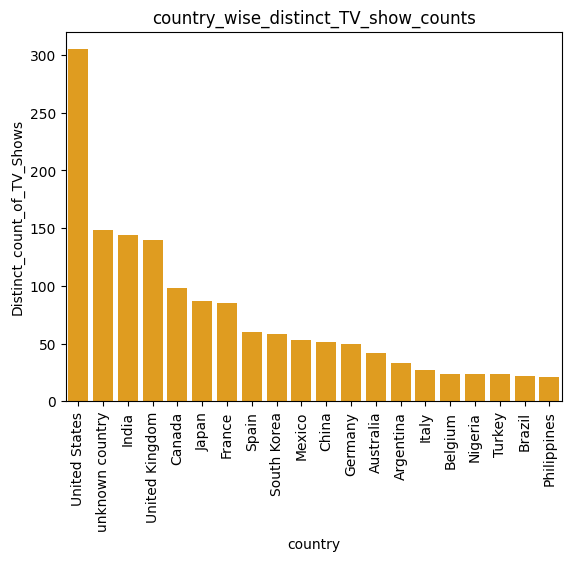

In [38]:
plt.title("country_wise_distinct_TV_show_counts")
plt.xticks(rotation=90,fontsize=10)
sns.barplot(data=Top_20_countries_producing_TV_Shows ,x="country",y="Distinct_count_of_TV_Shows",estimator=np.sum,color="orange")
plt.show()

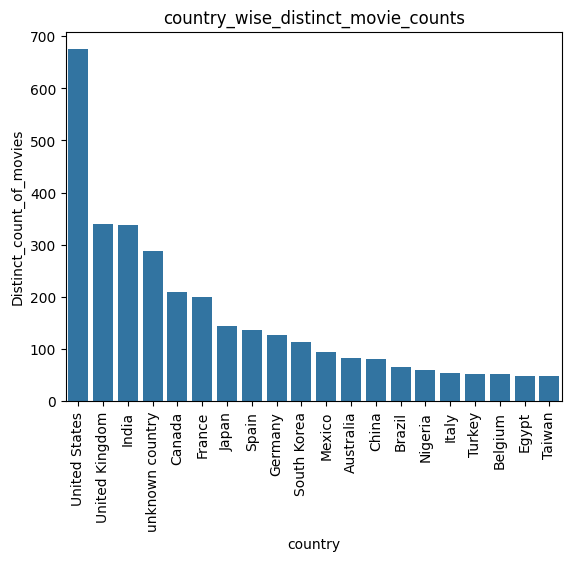

In [39]:
plt.title("country_wise_distinct_movie_counts")
plt.xticks(rotation=90,fontsize=10)
sns.barplot(data=Top_20_countries_producing_movies,x="country",y="Distinct_count_of_movies",estimator=np.sum)
plt.show()

# Question 2 ---->>> Insights!!!

1. The stand out comparion between the movies count and TV shows count is being dominated by the USA, there is no other country near USA, in producing movies or TV shows, as per this data

2. india and UK is fairly doing good in producing moovies but not the TV shows.

3. UK, japan and south korea are doing better than the other countries in producing TV shows, but way below than the USA.

4. all the other countries are marginally equal in producing the movies and TV shows.



# Question 2 ---->> recomendations!!!

1. Since most of the movies and TV shows are being taken from the USA, it didnt cover up all the other countries movies and TV shows, so to increase the viewvership from all the other countries increase the content from that country in the platform.

2. In specifically in india you can target the movies other than the TV shows, to increase the viewership.

3. In specifically countries like japan, south korea and in UK we can target the TV shows to increase the viewership.

4. According to the countries interest, and local pepole's choice we can add movies or TV show to the platform.




# 3. Analysis of actors/directors of different types of shows/movies!!! (director-analysis)!!!!

In [40]:
Analysis_of_directors_for_TV_shows=TV_Show_df.groupby("director")["title"].nunique().sort_values(ascending=False).reset_index().head(20)
Analysis_of_directors_for_TV_shows.rename(columns={"title":"count_of_distinct_director_TV_shows"},inplace=True)

In [41]:
Analysis_of_directors_for_movies=Movie_df.groupby("director")["title"].nunique().sort_values(ascending=False).reset_index().head(20)
Analysis_of_directors_for_movies.rename(columns={"title":"count_of_distinct_director_movies"},inplace=True)

In [42]:
Analysis_of_directors_for_TV_shows

,director,count_of_distinct_director_TV_shows
0,unknown director,290
1,Jan Suter,8
2,Raúl Campos,7
3,Michael Simon,5
4,Robert Rodriguez,5
5,Cathy Garcia-Molina,5
6,Martin Campbell,4
7,Michael McKay,4
8,Marcus Raboy,4
9,David Fincher,4


In [43]:
Analysis_of_directors_for_movies

,director,count_of_distinct_director_movies
0,unknown director,602
1,Jan Suter,13
2,Marcus Raboy,12
3,Jay Karas,11
4,Raúl Campos,11
5,David Dhawan,9
6,Martin Scorsese,8
7,Don Michael Paul,7
8,Justin G. Dyck,7
9,Yılmaz Erdoğan,7


# Graphical reprresentation for Question no:3:


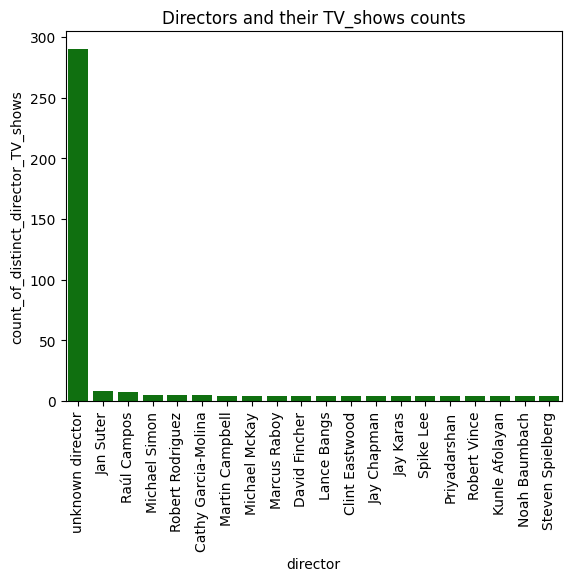

In [44]:
plt.title("Directors and their TV_shows counts")
plt.xticks(rotation=90,fontsize=10)
sns.barplot(data=Analysis_of_directors_for_TV_shows,x="director",y="count_of_distinct_director_TV_shows",color="green")
plt.show()

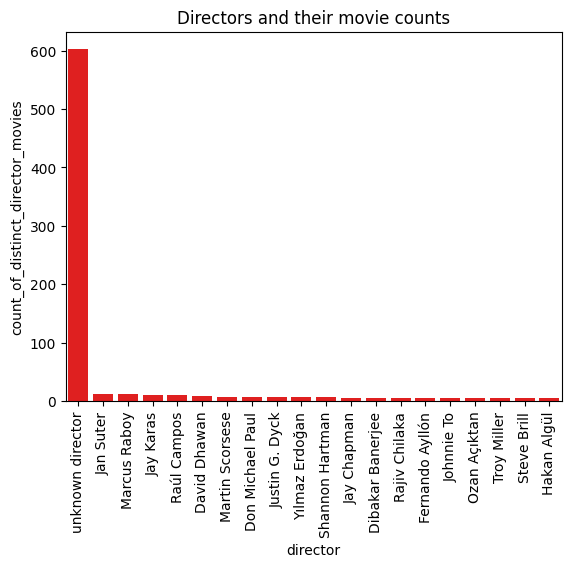

In [45]:
plt.title("Directors and their movie counts")
plt.xticks(rotation=90,fontsize=10)
sns.barplot(data=Analysis_of_directors_for_movies,x="director",y="count_of_distinct_director_movies",color="red")
plt.show()

# Question 3 ----->>>> insights!!!

1. Directors directing many TV shows are very rare scenario, according to this data.

2. Almost all the directors are equally directing and evenly distributed in the density population of one TV show.

3. Whereas, in the movies plot we derive that directors went on to take so many films.

4. In the movies plot we get that the average films taken by the director is almost to 18.

5. In the movies plot there is no significant difference between the directors and their frequency in taking the films.



# Question 3 --------->>>>> recommendations!!!

1. Since the different movies are being taken by same director, we can say that, netflix should consider few metrics here to add those ditrectors movies into the platform, metrics like ratings, viewership, budget, box-office-collection and all the other metrics.

2. Similarly for TV shows it should be the content and intensity and genres are neede to be consider before adding those to the platform, since we cannot go with the directors metrics for TV shows.



# 4.0  Understanding what content is available in different countries!!!!

In [46]:
movie_content=Movie_df.groupby(["country","listed_in"])["title"].nunique().sort_values(ascending=False).reset_index().head(10)
movie_content.rename(columns={"title":"count_of_different_movie_genres"},inplace=True)
movie_content

,country,listed_in,count_of_different_movie_genres
0,United States,Dramas,288
1,United States,International Movies,286
2,United States,Comedies,212
3,United States,Action & Adventure,153
4,United Kingdom,Dramas,153
5,India,Dramas,141
6,India,International Movies,138
7,United Kingdom,International Movies,136
8,India,Comedies,122
9,unknown country,Dramas,120


# Graphical representation of Question 4...!!!!

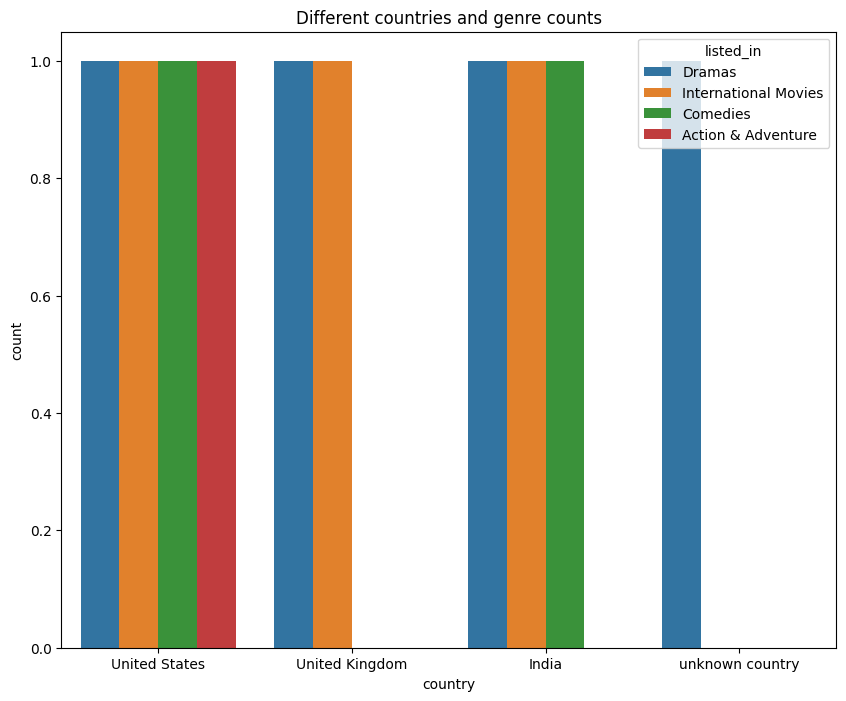

In [47]:
plt.figure(figsize=(10,8))
plt.title("Different countries and genre counts")
sns.countplot(data=movie_content,x="country",hue="listed_in")
#plt.ylim(100,500)
plt.show()

# Question 4 ---->>>> insights!!!!

1. As you can infere from the table, international movies and dramas are the big genres dominating india.

2. While for USA it is slightly different case, becaues documentaries are just dominating and comedies are less prefered ones in USA.





# Question 4 ------->>>> recommendation!!!!

1. Since, indians like more drama genre type of movies, after some really few good metrics, we can surely add that in our platform, according to this data.

2. Since USA, likes lot of short movies or documentaries, netflix can add as many as possible, because that would cost less, in investing.

3. comedy and all the other type of genres are really need a deep analysis, before they get added to the platform.

4. Giving more adds on the documentaries in india and drama genres movies in USA would significantly improve these type of different genres get watched by both country people and shoots up the revenue in these both in both the countries.



# 5.0 Finding After how many days the movie will be added to Netflix after the release of the movie!!!!

In [48]:
df["date_added"]=pd.to_datetime(df["date_added"],errors="coerce")

In [49]:
df["year_added"]=df["date_added"].dt.year

In [50]:
df["difference_in_movie/tv-show_added"]=df["year_added"]-df["release_year"]

In [51]:
mode_of_release= df.groupby("year_added")["difference_in_movie/tv-show_added"].agg(lambda x: x.mode().iloc[0])

In [52]:
mode_of_release = mode_of_release.reset_index()
mode_of_release

,year_added,difference_in_movie/tv-show_added
0,2008.0,1.0
1,2009.0,0.0
2,2010.0,23.0
3,2011.0,23.0
4,2012.0,0.0
5,2013.0,0.0
6,2014.0,0.0
7,2015.0,0.0
8,2016.0,0.0
9,2017.0,0.0


# Graphical representattion of question 5.0

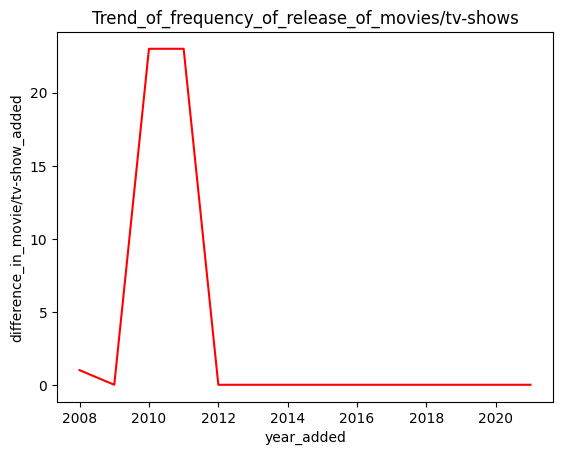

In [53]:
sns.lineplot(x="year_added",y="difference_in_movie/tv-show_added",data=mode_of_release,color="red")
plt.title("Trend_of_frequency_of_release_of_movies/tv-shows")
plt.show()

# Question 5.0-------->>>>>> in-sights!!!

1. In the year of 2008, the mode of release of movies or tv shows, it is just 1-year after the movie or tv show get released.

2. As we can see from the graph, there is a suden increase in the spike, in the year of 2010 and 2011.

3. From 2012 onwards there is no spike in the graph and also it remains constant, and we can say that without any further delay the movies are getting released in the platform, that is in the same year the movies are grtting released.



# Question 5.0 ----------->>>>>>> recommendation

1. If the movies or tv shows are hyped so much we can release them even in the same week, with some support from the prodution team.

2. For rating and review we can analyse the yoy-tube channels.

3. From the theterical performance and global audience for that particular director or actor can be consider as the KPI and being released in the platform.

4. For the buudget of the movie/tv shows we can consider the box office collection of the particullar movie.


# 6.0 Does Netflix has more focus on TV Shows than movies in recent years!!!!

In [54]:
comparion_of_movies_and_tv_shows = df[df["year_added"].apply(lambda x: x>= (df["year_added"].max()-5))]

In [55]:
comparion_of_movies_and_tv_shows = comparion_of_movies_and_tv_shows.groupby("type")["title"].nunique().reset_index()

In [56]:
comparion_of_movies_and_tv_shows.rename(columns={"title":"count_movies/tv_shows"},inplace=True)

In [57]:
comparion_of_movies_and_tv_shows

,type,count_movies/tv_shows
0,Movie,6030
1,TV Show,2552


# Graphical representation of question no: 6.0.

<ipython-input-58-8961b487dc7e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparion_of_movies_and_tv_shows ,x="type",y="count_movies/tv_shows",palette=colors,legend=False)


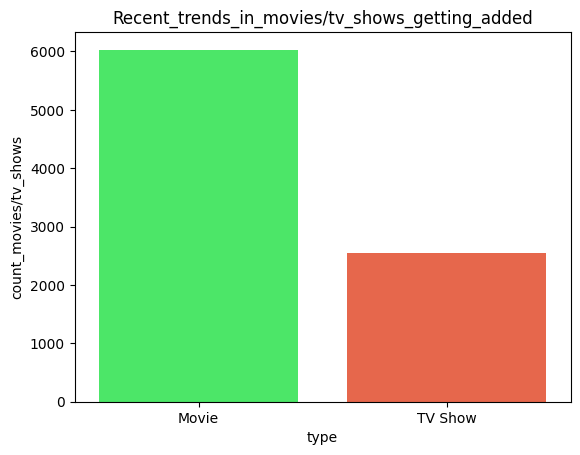

In [58]:
plt.title("Recent_trends_in_movies/tv_shows_getting_added")
plt.xticks(rotation=0,fontsize=10)
colors={"TV Show":"#FF5733","Movie":"#33FF57"}
sns.barplot(data=comparion_of_movies_and_tv_shows ,x="type",y="count_movies/tv_shows",palette=colors,legend=False)
plt.show()

# Question 6.0 --------->>>> insigths...

1. Number of movies getting added into the platform is really high, as you can see from the graph.

2. number of tv-shows getting added to the platform is very minimal, not even a 50% when compared to the number of movies!!!



# question 6.0 ------------>>>>> recommendations.

1. Yes, it is indeed that tv-shows release is also very less when compared to the movies, and adding is also very less.

2. Since our platform foucses only on the USA based tv shows a lot, other country people would have not watch the tv shows.

3. focusing on other country cultural tv shows would help us again more viewvership on different countries.

4. encouraging documentaries would help you gain more viwership.



# 7.0 Analysis on continous columns.

<Figure size 1500x800 with 0 Axes>

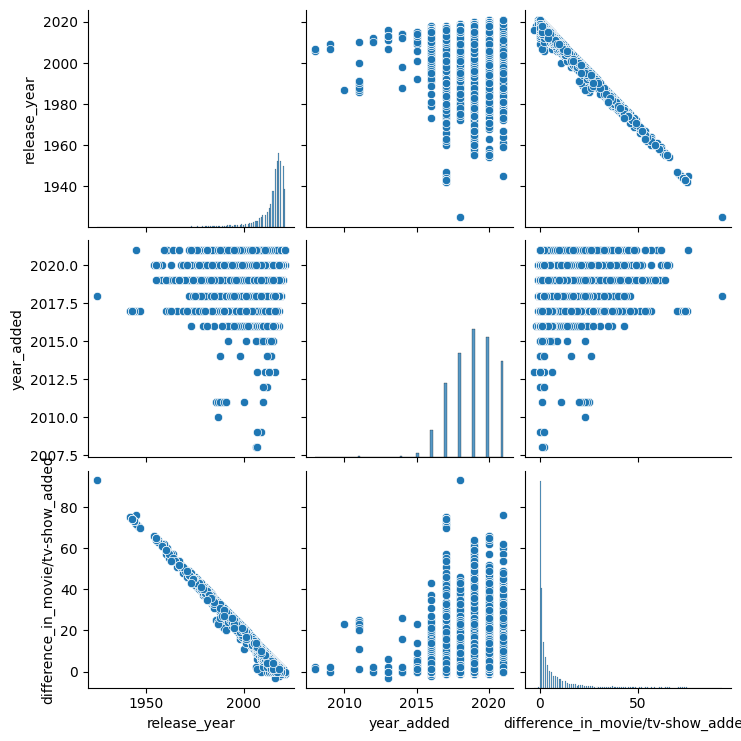

In [59]:
plt.figure(figsize=(15,8))
sns.pairplot(data=df)
plt.show()